## Business Scenario
A retail company spends money on advertising to increase product sales.
The marketing team believes that TV advertising spend has a strong impact on sales.
The management wants answers to the following question:
“If we increase our TV advertising budget, how will it affect sales?”
You are hired as a data analyst to analyze this relationship and build a predictive model.
### 📝 Tasks
1. Load the given dataset and explore its columns.
2. Use TV advertising spend as the input feature and Sales as the target variable.
3. Build a model that can learn the relationship between TV spend and Sales.
4. Train the model using historical data.
5. Predict sales for unseen data points.
6. Predict sales when TV advertising spend is 150 units.
7. Measure how accurate your predictions are.
8. Visualize:
The actual data points
The best-fit straight line learned by the model
9. Interpret the result in simple business terms:
Does higher TV spend increase sales?
Is the prediction error acceptable?
10. Suggest one improvement to make the prediction better.

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\91934\OneDrive\Desktop\AI&DS-Tekworks\Machine_learning\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

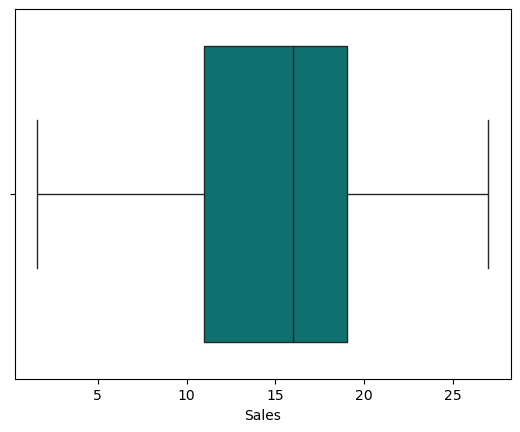

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Sales'],color="teal")
plt.show()

In [8]:
X=df["TV"].values.reshape(-1,1)
y=df["Sales"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)
 
X_train, X_test
 

(array([[116. ],
        [177. ],
        [ 43.1],
        [ 62.3],
        [224. ],
        [ 38.2],
        [ 70.6],
        [147.3],
        [104.6],
        [ 76.3],
        [ 78.2],
        [168.4],
        [  8.7],
        [  7.8],
        [ 76.4],
        [129.4],
        [ 73.4],
        [289.7],
        [ 19.6],
        [197.6],
        [284.3],
        [184.9],
        [112.9],
        [ 23.8],
        [290.7],
        [ 19.4],
        [293.6],
        [ 18.7],
        [134.3],
        [ 25.6],
        [100.4],
        [ 80.2],
        [188.4],
        [177. ],
        [125.7],
        [209.6],
        [142.9],
        [184.9],
        [222.4],
        [241.7],
        [ 17.2],
        [120.5],
        [ 89.7],
        [191.1],
        [ 75.5],
        [193.2],
        [ 85.7],
        [266.9],
        [ 39.5],
        [261.3],
        [ 13.2],
        [193.7],
        [296.4],
        [265.6],
        [214.7],
        [149.7],
        [131.7],
        [ 57.5],
        [240.1

In [9]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 0.05548294393146318
Intercept (c): 7.007108428241851


In [10]:
print(X_test)
y_pred = model.predict(X_test)
y_pred

[[163.3]
 [195.4]
 [292.9]
 [ 11.7]
 [220.3]
 [ 75.1]
 [216.8]
 [ 50. ]
 [222.4]
 [175.1]
 [ 31.5]
 [ 56.2]
 [234.5]
 [  5.4]
 [139.5]
 [170.2]
 [  7.3]
 [197.6]
 [ 75.3]
 [237.4]
 [229.5]
 [ 67.8]
 [ 38. ]
 [250.9]
 [ 69. ]
 [ 53.5]
 [213.5]
 [139.3]
 [ 87.2]
 [  8.4]
 [199.8]
 [ 69.2]
 [198.9]
 [ 16.9]
 [280.7]
 [238.2]
 [ 48.3]
 [273.7]
 [117.2]
 [ 27.5]]


array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [12]:
import numpy as np
new_spend = np.array([[100]])
predicted_sales = model.predict(new_spend)
 
print("Predicted sales for 100 units spend on TV adverstiment :", predicted_sales[0])
 

Predicted sales for 100 units spend on TV adverstiment : 12.555402821388169


In [13]:
import numpy as np
new_spend = np.array([[150]])
predicted_sales = model.predict(new_spend)
 
print("Predicted sales for 150 units spend on TV adverstiment :", predicted_sales[0])
 

Predicted sales for 150 units spend on TV adverstiment : 15.329550017961328


In [19]:
from sklearn.metrics import mean_squared_error,r2_score
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ", mse)
print("R2_score :",r2_score(y_test,y_pred))
print("Root mean squared error : ",np.sqrt(mse))

Mean Squared Error :  6.101072906773964
R2_score : 0.802561303423698
Root mean squared error :  2.470035001123256


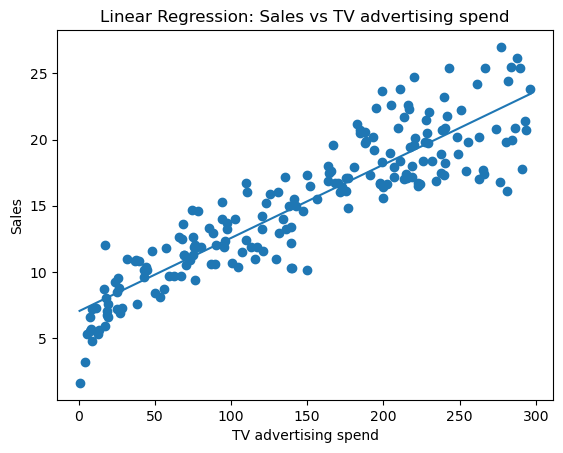

In [18]:
import matplotlib.pyplot as plt
import numpy as np
 
# Create smooth values for X-axis (for straight line)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 
# Predict sales for the TV spend
y_line = model.predict(X_line)
 
# Plot actual data points
plt.figure()
plt.scatter(X, y)
 
# Plot regression line
plt.plot(X_line, y_line)
 
# Labels and title
plt.xlabel("TV advertising spend")
plt.ylabel("Sales")
plt.title("Linear Regression: Sales vs TV advertising spend")
 
# Show plot
plt.show()

As the TV advertisement spend goes higher there is increase in the sales

The prediction error mse : 6.101072906773964 is acceptable ,as it is smaller error value 
